In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
movies_url = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula6.2/movies.csv'
ratings_url = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula6.2/ratings.csv'
movies = pd.read_csv(movies_url)
ratings = pd.read_csv(ratings_url)

In [3]:
# Clean and prepare movies data
movies = movies.set_index('movieId')
movies = movies.join(movies['genres'].str.get_dummies()).drop('genres', axis=1)
movies['year'] = movies['title'].str.extract(r'.*\((\d+)\)')
movies = movies.dropna()

In [4]:
# Prepare ratings data
rounded = ratings['rating'].round(1)
all_means = ratings.groupby('movieId')['rating'].mean()

In [5]:
# Insert ratings data into movies df
movies = movies.join(all_means).dropna().sort_values('rating', ascending=False).rename(columns={'rating': 'mean'})
total = ratings.groupby('movieId')['timestamp'].count()
movies = movies.join(total).rename(columns={'timestamp': 'total'})
movies = movies.query('total > 50')
movies['category_mean'] = (movies['mean']).round(1).values

random_movies = movies.sample(10)

<AxesSubplot:>

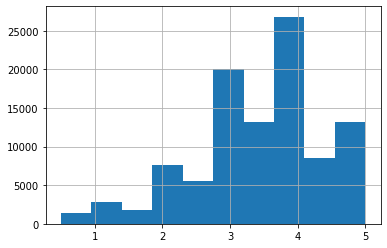

In [6]:
ratings['rating'].hist()

In [7]:
rounded.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

<AxesSubplot:ylabel='rating'>

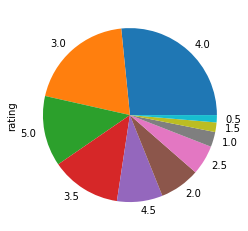

In [8]:
rounded.value_counts().plot.pie()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Colors

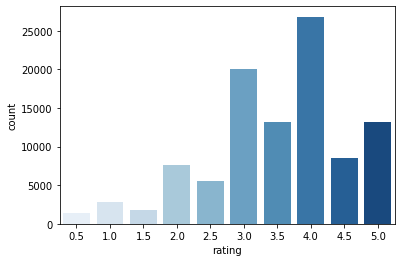

In [11]:
palette = sns.color_palette('Blues', 10)
sns.countplot(x=rounded, palette=palette);

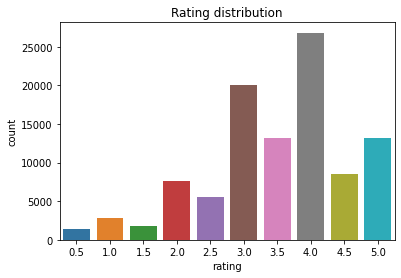

In [12]:
sns.countplot(x=rounded)
plt.title("Rating distribution"); # the ; removes unimportant messages

<AxesSubplot:ylabel='Density'>

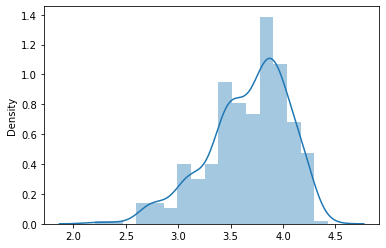

In [13]:
sns.distplot(x=movies['mean'])

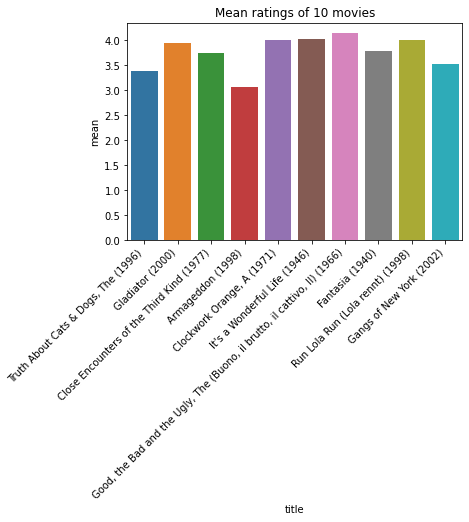

In [14]:
plot = sns.barplot(data=random_movies, x='title', y='mean')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
# if we want to lie: plt.ylim(2.5, 4)
plt.title("Mean ratings of 10 movies")
plt.show()

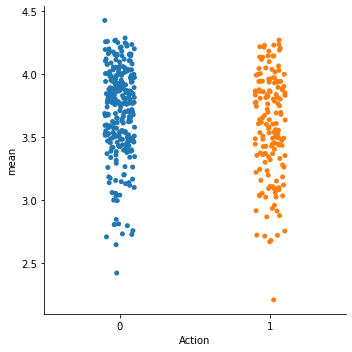

In [15]:
sns.catplot(data=movies, x='Action', y='mean')

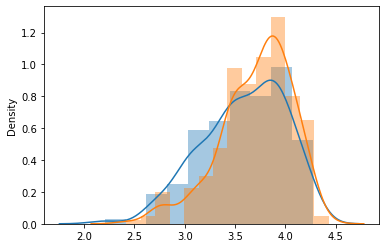

In [16]:
sns.distplot(x=movies.query('Action == 1')['mean'])
sns.distplot(x=movies.query('Action == 0')['mean'])
plt.show()

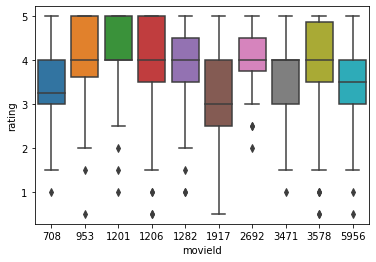

In [17]:
random_ids = ','.join(random_movies.index.values.astype(str))
query = f'movieId in ({random_ids})'
sns.boxplot(data=ratings.query(query), x='movieId', y='rating')
plt.show()

In [ ]:
total_categories = len(movies['category_mean'].unique())
sns.catplot(data=movies, x='year', y='mean', palette=sns.color_palette('Blues', total_categories), hue='mean');